- ESTUDIO DE LA POBLACIÓN ESPAÑOLA.
- EVOLUCIÓN DE LA POBLACIÓN PARA LOS PROXIMOS AÑOS.
- ESTUDIO DE LAS PERSONAS DEPENDIENTES EN LOS PROXIMOS AÑOS.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing




In [334]:
# Load the CSV file and split the single column into multiple columns
datos = pd.read_csv("56934.csv", sep=';', encoding='latin1')

datos['Año'] = datos['Periodo'].fillna('').astype(str).str.extract(r'(\d{4})')[0].dropna().astype(int)
datos['Edad'] = datos['Edad simple'].str.extract(r'(\d+)')[0].astype(float)
datos = datos.drop(columns=['Sexo', 'Edad simple', 'Periodo'])
datos = datos.dropna(subset=['Año', 'Edad', 'Total'])

# Eliminar filas donde el valor de 'Total' sea ".."
datos = datos[datos['Total'] != ".."]

# Eliminar puntos ('.') en la columna 'Total' y convertirla a float
# Ensure 'Total' is treated as a string before applying string operations
datos['Total'] = datos['Total'].astype(str).str.replace('.', '', regex=False)

# Eliminar filas duplicadas basadas en 'Año' y 'Edad', manteniendo la fila con el mayor 'Total'
datos = datos.sort_values('Total', ascending=False).drop_duplicates(subset=['Año', 'Edad'], keep='first')

# Limpiar la columna 'Total' eliminando comas and converting back to float
datos['Total'] = datos['Total'].str.replace('.', '').astype(int)

datos['Año'] = datos['Año'].astype(int)
datos['Edad'] = datos['Edad'].astype(int)

# Ordenar los datos primero por la columna 'Año' y luego por 'Edad'
datos = datos.sort_values(by=['Año', 'Edad'], ascending=[True, True])

datos.head(100)
datos.to_csv('datos_agrupados.csv', index=False)

#################################################################

# Cargar los datos desde el archivo CSV
datos_agrupados = pd.read_csv('datos_agrupados.csv')

# Agrupar las edades en intervalos de 10 años
datos_agrupados['Grupo_Edad'] = (datos_agrupados['Edad'] // 20) * 20 #MODIFICANDO LOS NUMEROS FINLES OBTENERMOS DE CUANTO EN CUANTO VISUALIZAR

# Agrupar por año y grupo de edad, sumando los totales
datos_agrupados_por_grupo = datos_agrupados.groupby(['Año', 'Grupo_Edad'])['Total'].sum().reset_index()
datos_agrupados['Total'] = datos_agrupados['Total'].astype(float)
print(datos_agrupados_por_grupo.head())


#######################################################################
# Filtrar los datos para el año 2024 y limitar la edad entre 0 y 100
datos_actuales = datos_agrupados[(datos_agrupados['Año'] == 2024) & (datos_agrupados['Edad'] <= 100)]
# Ensure 'Total' is treated as a string before applying string operations
datos_actuales['Total'] = datos_actuales['Total'].astype(str).str.replace('.', '', regex=False).astype(int)

datos_actuales['Año'] = datos_actuales['Año'].astype(int)
datos_actuales['Edad'] = datos_actuales['Edad'].astype(int)
datos_actuales['Grupo_Edad'] = datos_actuales['Grupo_Edad'].astype(int)

datos_actuales.to_csv('datos_2024.csv', index=False)



##########################################################################################

# Filtrar los datos desde 1970 hasta la actualidad
datos_poblacion = datos_agrupados_por_grupo.groupby('Año')['Total'].sum().reset_index()
datos_poblacion = datos_poblacion[datos_poblacion['Año'] < 2024]

# Calcular estadísticas
media_poblacion = datos_poblacion['Total'].mean()
mediana_poblacion = datos_poblacion['Total'].median()
coef_variacion = datos_poblacion['Total'].std() / media_poblacion






    Año  Grupo_Edad     Total
0  1971           0  12273638
1  1971          20   9453827
2  1971          40   7925634
3  1971          60   4369300
4  1971          80    348726


C:\Users\alber\AppData\Local\Temp\ipykernel_20412\2898950503.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_actuales['Total'] = datos_actuales['Total'].astype(str).str.replace('.', '', regex=False).astype(int)
C:\Users\alber\AppData\Local\Temp\ipykernel_20412\2898950503.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_actuales['Año'] = datos_actuales['Año'].astype(int)
C:\Users\alber\AppData\Local\Temp\ipykernel_20412\2898950503.py:52: SettingWithCopyWarning: 
A value is trying to be s

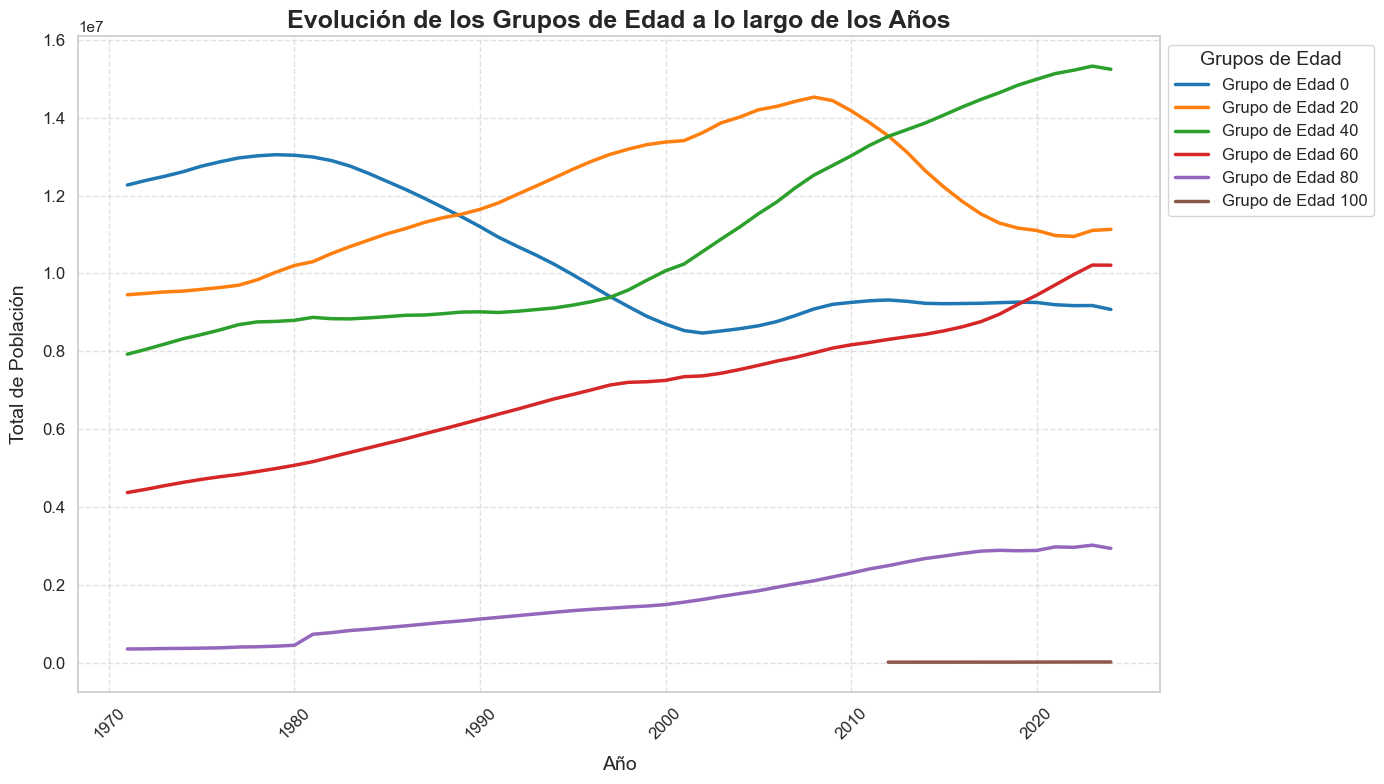

In [335]:
# Configurar el estilo de seaborn
sns.set_theme(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(14, 8))

# Crear una paleta de colores para los grupos de edad
palette = sns.color_palette("tab10", n_colors=len(datos_agrupados_por_grupo['Grupo_Edad'].unique()))

# Graficar cada grupo de edad
for color, grupo_edad in zip(palette, datos_agrupados_por_grupo['Grupo_Edad'].unique()):
    subset = datos_agrupados_por_grupo[datos_agrupados_por_grupo['Grupo_Edad'] == grupo_edad]
    sns.lineplot(
        x=subset['Año'], 
        y=subset['Total'], 
        label=f'Grupo de Edad {grupo_edad}', 
        color=color, 
        linewidth=2.5
    )

# Configurar el título y las etiquetas
plt.title('Evolución de los Grupos de Edad a lo largo de los Años', fontsize=18, fontweight='bold')
plt.xlabel('Año', fontsize=14, labelpad=10)
plt.ylabel('Total de Población', fontsize=14, labelpad=10)

# Ajustar las etiquetas del eje X
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Añadir una leyenda
plt.legend(title='Grupos de Edad', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Añadir una cuadrícula más sutil
plt.grid(axis='both', linestyle='--', alpha=0.6)

# Ajustar márgenes
plt.tight_layout()

# Mostrar la gráfica
plt.show()

C:\Users\alber\AppData\Local\Temp\ipykernel_20412\1689377342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


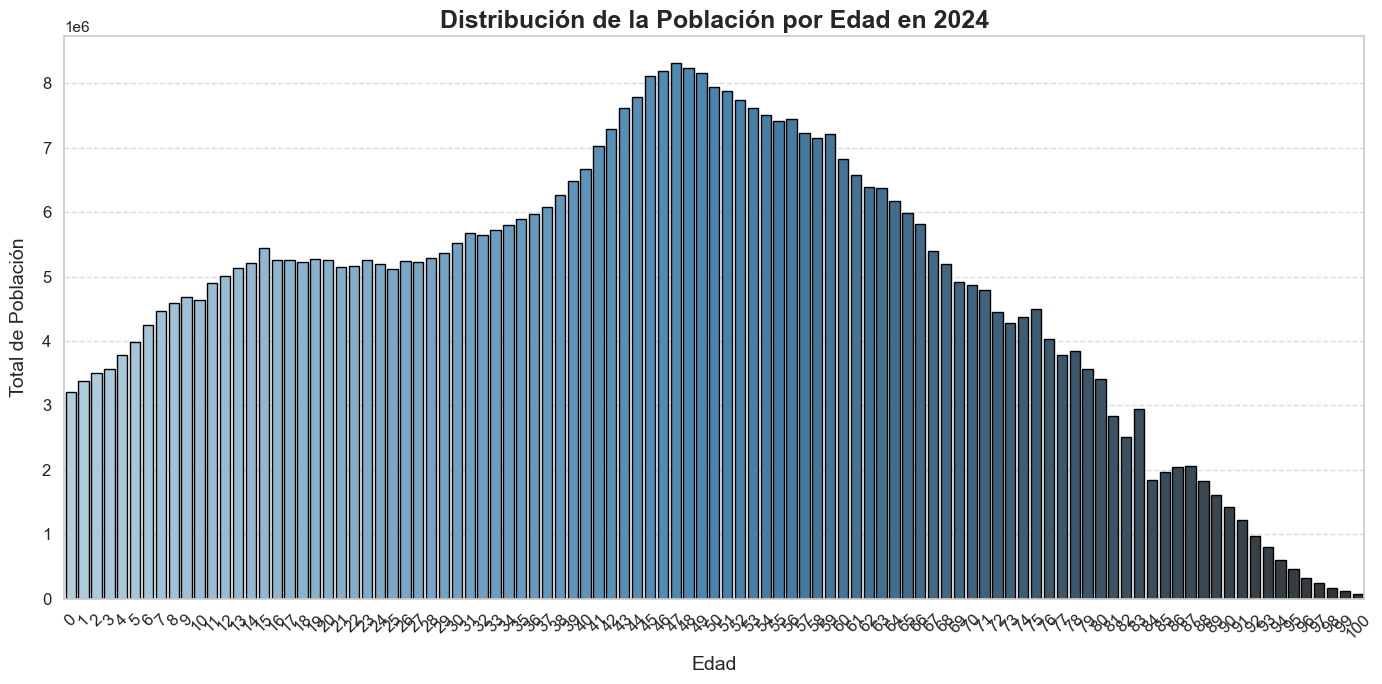

Población total en 2024: 486,103,990


In [336]:
# Configurar el estilo de seaborn
sns.set_theme(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x="Edad", 
    y="Total", 
    data=datos_actuales, 
    palette="Blues_d", 
    edgecolor="black"
)

# Añadir etiquetas y título
ax.set_title('Distribución de la Población por Edad en 2024', fontsize=18, fontweight='bold')
ax.set_xlabel('Edad', fontsize=14, labelpad=10)
ax.set_ylabel('Total de Población', fontsize=14, labelpad=10)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Añadir una cuadrícula más sutil
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Calcular y mostrar la población total en 2024
suma_totales = datos_actuales['Total'].sum()
print(f"Población total en 2024: {suma_totales:,}")


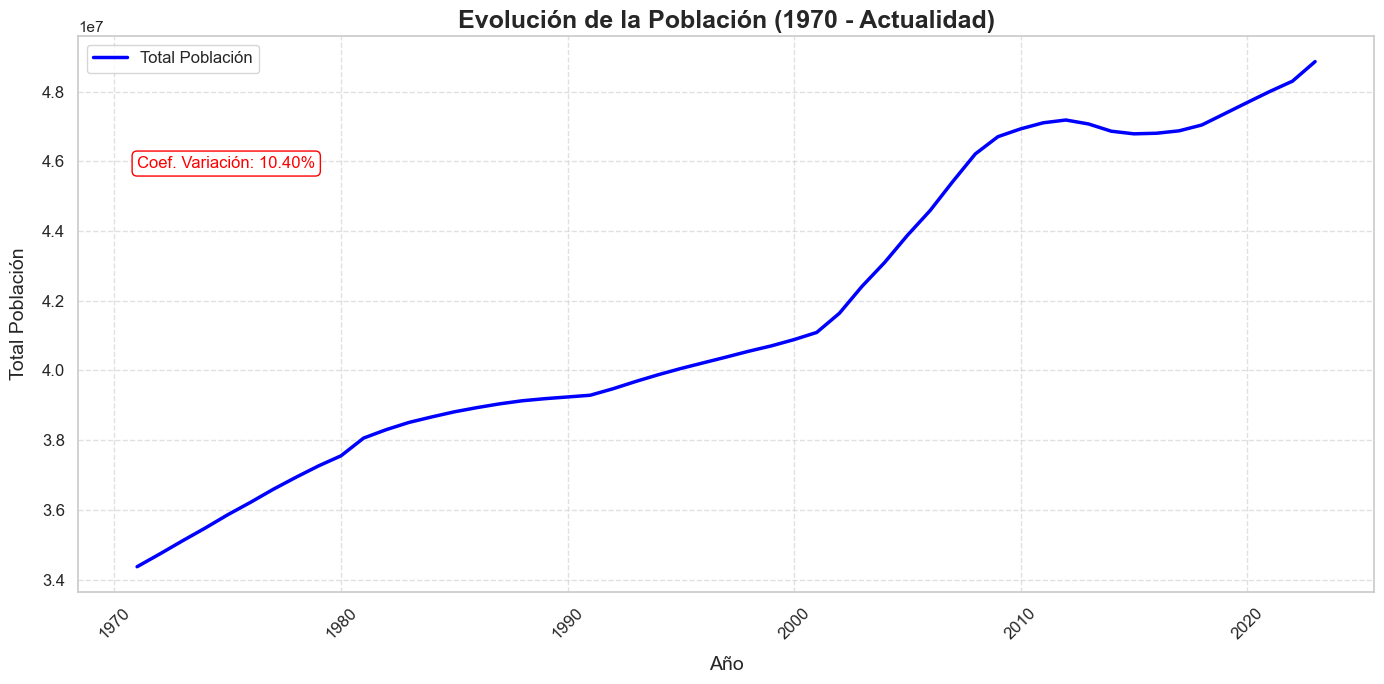

In [337]:
# Configurar el estilo de seaborn
sns.set_theme(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    x="Año", 
    y="Total", 
    data=datos_poblacion, 
    color="blue", 
    linewidth=2.5, 
    label="Total Población"
)

# Añadir texto para el coeficiente de variación
ax.text(
    x=datos_poblacion['Año'].min(), 
    y=media_poblacion * 1.1, 
    s=f'Coef. Variación: {coef_variacion:.2%}', 
    fontsize=12, 
    color='red', 
    bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3')
)

# Configurar el título y las etiquetas
ax.set_title('Evolución de la Población (1970 - Actualidad)', fontsize=18, fontweight='bold')
ax.set_xlabel('Año', fontsize=14, labelpad=10)
ax.set_ylabel('Total Población', fontsize=14, labelpad=10)

# Ajustar las etiquetas del eje X
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Añadir una cuadrícula más sutil
ax.grid(axis='both', linestyle='--', alpha=0.6)

# Añadir una leyenda
ax.legend(fontsize=12, loc='upper left')

# Ajustar márgenes
plt.tight_layout()

# Mostrar la gráfica
plt.show()



C:\Users\alber\AppData\Local\Temp\ipykernel_20412\3100839785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


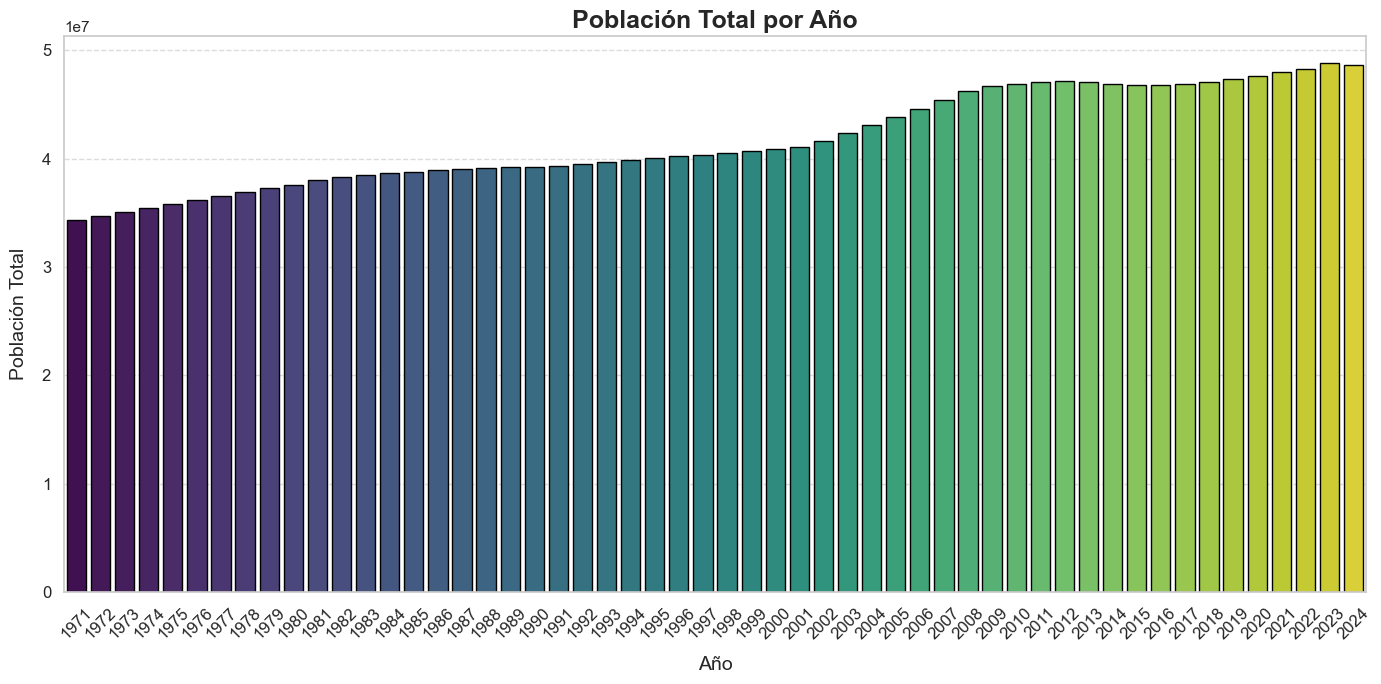

In [338]:
# Configurar el estilo de seaborn
sns.set_theme(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x=totales_por_año.index, 
    y=totales_por_año.values, 
    palette="viridis", 
    edgecolor="black"
)

# Añadir etiquetas y título
ax.set_title('Población Total por Año', fontsize=18, fontweight='bold')
ax.set_xlabel('Año', fontsize=14, labelpad=10)
ax.set_ylabel('Población Total', fontsize=14, labelpad=10)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Añadir una cuadrícula más sutil
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar la gráfica
plt.show()



C:\Users\alber\AppData\Local\Temp\ipykernel_20412\3461083231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


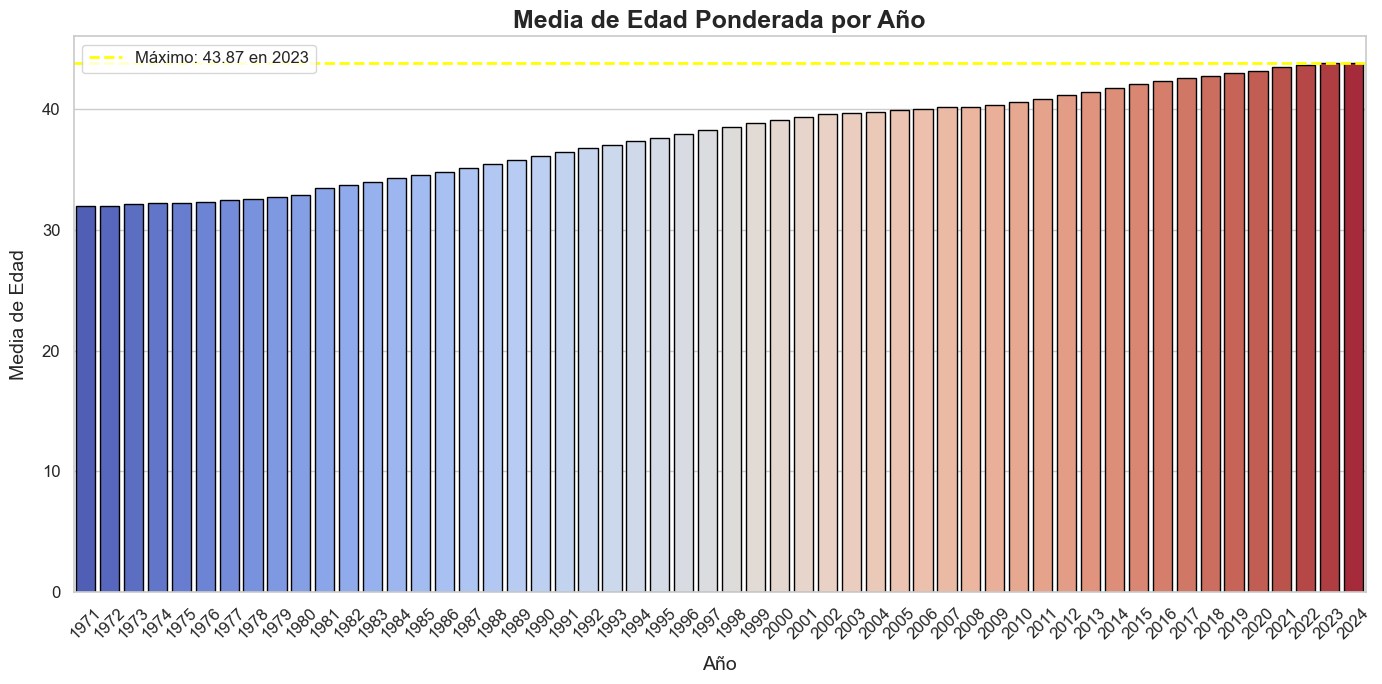

In [339]:
# Configurar el estilo de seaborn
sns.set_theme(style="whitegrid")

# Crear la gráfica con seaborn
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x="Año", 
    y="Media_Edad", 
    data=media_edad_por_año, 
    palette="coolwarm", 
    edgecolor="black"
)

# Añadir una línea amarilla para el valor máximo
ax.axhline(y=max_valor, color='yellow', linestyle='--', linewidth=2, label=f'Máximo: {max_valor:.2f} en {max_año}')

# Añadir etiquetas y título
ax.set_title('Media de Edad Ponderada por Año', fontsize=18, fontweight='bold')
ax.set_xlabel('Año', fontsize=14, labelpad=10)
ax.set_ylabel('Media de Edad', fontsize=14, labelpad=10)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Añadir leyenda
ax.legend(fontsize=12, loc='upper left')

# Ajustar márgenes
plt.tight_layout()

# Mostrar la gráfica
plt.show()


VAMOS A ESTUDIAR LA DEPENDENCIA

In [340]:
datos_dependencia = pd.read_csv("8724.csv", sep=';', encoding='latin1')

datos_dependencia_ok = datos_dependencia


#trabajamos con los datos de dependencia
datos_dependencia_ok = datos_dependencia[datos_dependencia['Situación de Dependencia'] == 'Personas en situación de dependencia']

# Filtrar filas donde 'Personas sin y con discapacidad' no sea igual a 'Total'
datos_dependencia_ok = datos_dependencia_ok[datos_dependencia_ok['Personas sin y con discapacidad'] != 'Total']
datos_dependencia_ok = datos_dependencia_ok[datos_dependencia_ok['Personas sin y con discapacidad'] != 'Porcentaje vertical: Personas sin discapacidad']
datos_dependencia_ok = datos_dependencia_ok[datos_dependencia_ok['Personas sin y con discapacidad'] != 'Porcentaje horizontal: Personas sin discapacidad']
datos_dependencia_ok = datos_dependencia_ok[datos_dependencia_ok['Personas sin y con discapacidad'] != 'Porcentaje vertical: Personas con discapacidad']
datos_dependencia_ok = datos_dependencia_ok[datos_dependencia_ok['Personas sin y con discapacidad'] != 'Porcentaje horizontal: Personas con discapacidad']
datos_dependencia_ok = datos_dependencia_ok[datos_dependencia_ok['Personas sin y con discapacidad'] != 'Porcentaje vertical: Total']
datos_dependencia_ok = datos_dependencia_ok[datos_dependencia_ok['Personas sin y con discapacidad'] != 'Porcentaje horizontal: Total']
datos_dependencia_ok = datos_dependencia_ok[datos_dependencia_ok['Grupo de edad'] != 'Total']



datos_dependencia_ok = datos_dependencia_ok.sort_values('Total', ascending=False).drop_duplicates(subset=['año'], keep='first')


datos_dependencia_ok.info() # Ver información sobre el DataFrame
datos_dependencia_ok.head(100) # Ver las primeras filas del DataFrame


datos_dependencia_ok.to_csv('datos_dependencia_limpios.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 325 to 456
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Grupo de edad                    5 non-null      object
 1   Situación de Dependencia         5 non-null      object
 2   Personas sin y con discapacidad  5 non-null      object
 3   año                              5 non-null      int64 
 4   Total                            5 non-null      object
dtypes: int64(1), object(4)
memory usage: 240.0+ bytes


In [341]:
file_path = "datos_agrupados.csv"  # Asegurar que el archivo esté en el directorio de trabajo
df = pd.read_csv(file_path)
# Agrupar los datos por año y sumar los totales
datos_agrupados_anuales = df.groupby('Año')['Total'].sum().reset_index()

# Renombrar la columna 'Total' a 'Edad'
datos_agrupados_anuales.rename(columns={'Total': 'Edad'}, inplace=True)

# Guardar el resultado en un nuevo archivo CSV
datos_agrupados_anuales.to_csv('datos_agrupados_anuales.csv', index=False)
datos_agrupados_anuales.info() # Ver información sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Año     54 non-null     int64
 1   Edad    54 non-null     int64
dtypes: int64(2)
memory usage: 996.0 bytes


In [342]:

file_path = "datos_agrupados_anuales.csv"  # Asegurar que el archivo esté en el directorio de trabajo
df = pd.read_csv(file_path)



# Filtrar el conjunto de entrenamiento (1971-2022) y test (2024)
train_df = df[(df["Año"] >= 1971) & (df["Año"] < 2020)]
test_df = df[df["Año"] >= 2020]

# Descomposición de la serie temporal en tendencia, estacionalidad y residuos
result = seasonal_decompose(train_df["Edad"], model='additive', period=12)

# Modelo 1: Holt-Winters
model_hw = ExponentialSmoothing(train_df["Edad"], trend='add', seasonal='add', seasonal_periods=12)
fit_hw = model_hw.fit()
predictions_hw = fit_hw.forecast(steps=12)

# Calcular intervalo de confianza del 95% para Holt-Winters
std_error_hw = np.std(fit_hw.resid)
ci_upper_hw = predictions_hw + 1.96 * std_error_hw
ci_lower_hw = predictions_hw - 1.96 * std_error_hw

# Modelo 2: Predicción basada en tendencia + estacionalidad
trend_forecast = result.trend.dropna().iloc[-12:].values  # Últimos 12 valores de la tendencia
seasonality_forecast = result.seasonal[:12].values  # Patrones estacionales iniciales repetidos
predictions_decomp = trend_forecast + seasonality_forecast

# Calcular intervalo de confianza del 95% para el modelo basado en descomposición
std_error_decomp = np.std(result.resid.dropna())
ci_upper_decomp = predictions_decomp + 1.96 * std_error_decomp
ci_lower_decomp = predictions_decomp - 1.96 * std_error_decomp

c:\Users\alber\Desktop\Alberto\Máster\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


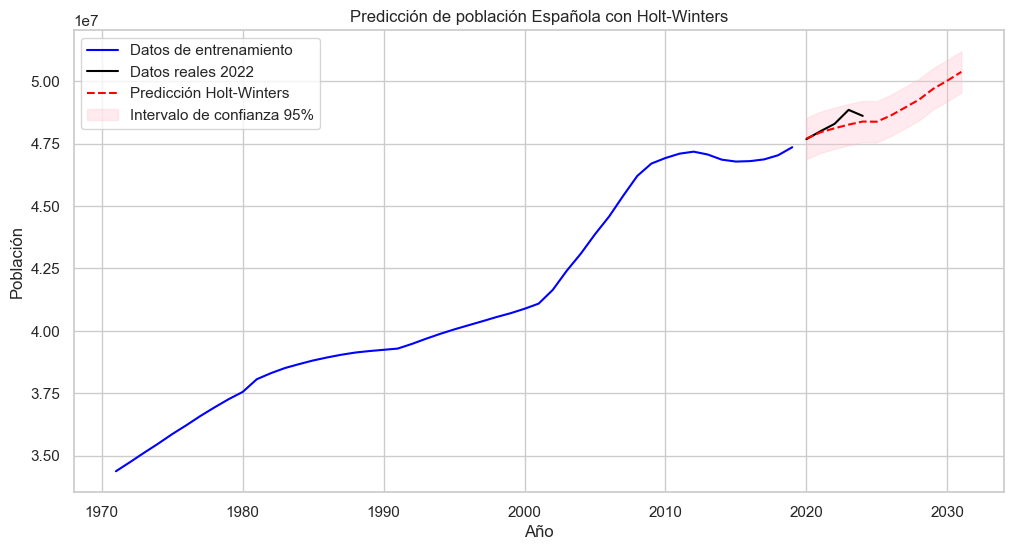

In [343]:
# Graficar predicción con Holt-Winters
plt.figure(figsize=(12, 6))
plt.plot(train_df["Año"], train_df["Edad"], label='Datos de entrenamiento', color='blue')
plt.plot(test_df["Año"][:len(predictions_hw)], test_df["Edad"][:len(predictions_hw)], label='Datos reales 2022', color='black')
# Extend the x-axis values to match the length of predictions_hw
x_values_hw = list(range(test_df["Año"].iloc[0], test_df["Año"].iloc[0] + len(predictions_hw)))

plt.plot(x_values_hw, predictions_hw, label='Predicción Holt-Winters', color='red', linestyle='dashed')
plt.fill_between(x_values_hw, ci_lower_hw, ci_upper_hw, color='pink', alpha=0.3, label='Intervalo de confianza 95%')
plt.xlabel("Año")
plt.ylabel("Población")
plt.title("Predicción de población Española con Holt-Winters")
plt.legend()
plt.grid(True)
plt.show()



In [344]:
# Cargar el archivo CSV para definir datos_depEsp
datos_depEsp = pd.read_csv("1455.csv", sep=';', encoding='latin1')

# Eliminar los dos primeros caracteres de la columna 'Comunidades y Ciudades Autónomas'
#datos_depEsp['Comunidades y Ciudades Autónomas'] = datos_depEsp['Comunidades y Ciudades Autónomas'].str[3:]

# Renombrar las columnas
datos_depEsp.rename(columns={
    'Comunidades y Ciudades Autónomas': 'Comunidad',
    'Periodo': 'Año'
}, inplace=True)

# Cambiar los tipos de datos de las columnas
datos_depEsp['Comunidad'] = datos_depEsp['Comunidad'].astype(str)
datos_depEsp['Año'] = datos_depEsp['Año'].astype('Int64')  # Cambiar a float



# Reemplazar comas por puntos en la columna 'Total' y convertirla a float
datos_depEsp['Total'] = datos_depEsp['Total'].str.replace('.', ',').astype(str)

# Ordenar los datos por 'Comunidad' y luego por 'Año'
datos_depEsp = datos_depEsp.sort_values(by=['Comunidad', 'Año'], ascending=[True, True])

# Mostrar los primeros registros para verificar
datos_depEsp.head()
# Guardar los datos limpios en un archivo CSV
datos_depEsp.to_csv('dependencia_esp2.csv', index=False)
datos_depEsp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 99 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comunidad  1000 non-null   object
 1   Año        1000 non-null   Int64 
 2   Total      1000 non-null   object
dtypes: Int64(1), object(2)
memory usage: 32.2+ KB
